## Dimensionality Reduction: Pima Indians Diabetes Dataset
https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

** Dataset Information: **

Selected medical exams from a large database (total 768 cases) for females at least 21 years old of Pima Indian heritage.

** Attribute Information: **

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

** Objective of this project **

predict whether a patient has diabetes (class; 0 or 1) based on diagnostic variables (features compressed with PCA)

## Data

In [1]:
#options(warn=-1)
# Load Data
df  <- read.csv('pima-indians-diabetes.data',header=FALSE)
colnames(df) = c('Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'label')

In [2]:
# Inspect Data
head(df,3)

Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,label
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1


In [3]:
dim(df)

[1] 768   9

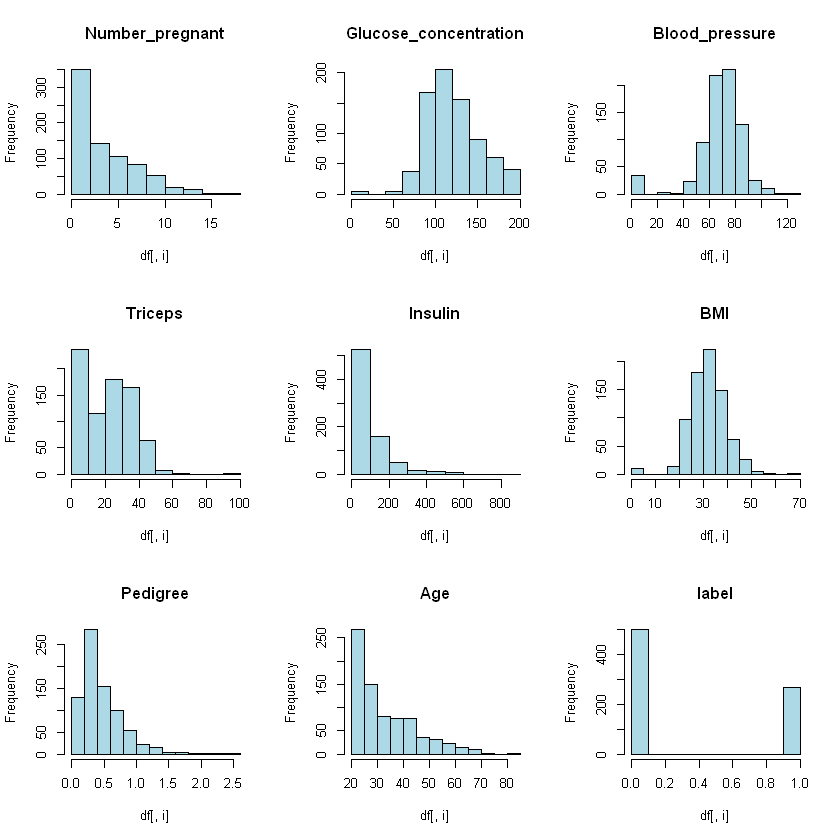

In [4]:
par(mfrow=c(3,3))
for(i in 1:9) {
    hist(df[,i], main=names(df)[i], col='lightblue')
}

corrplot 0.84 loaded


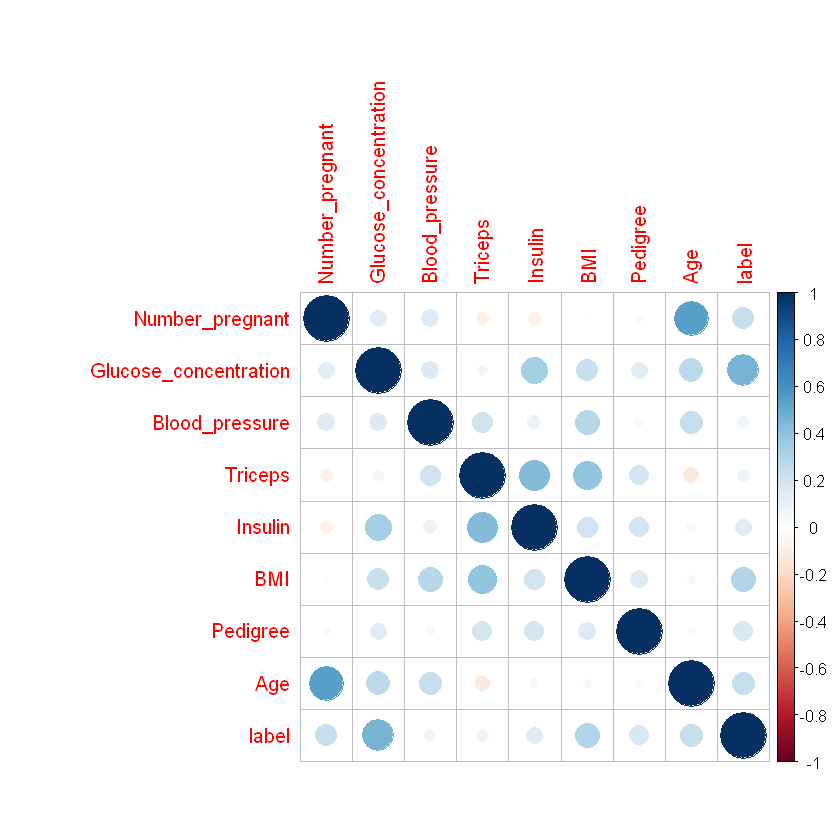

In [5]:
library(corrplot)
corrplot(cor(df), method="circle")

In [6]:
str(df)

'data.frame':	768 obs. of  9 variables:
 $ Number_pregnant      : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose_concentration: int  148 85 183 89 137 116 78 115 197 125 ...
 $ Blood_pressure       : int  72 66 64 66 40 74 50 0 70 96 ...
 $ Triceps              : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin              : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                  : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ Pedigree             : num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                  : int  50 31 32 21 33 30 26 29 53 54 ...
 $ label                : int  1 0 1 0 1 0 1 0 1 1 ...


In [7]:
summary(df)

 Number_pregnant  Glucose_concentration Blood_pressure      Triceps     
 Min.   : 0.000   Min.   :  0.0         Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0         1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0         Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9         Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2         3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0         Max.   :122.00   Max.   :99.00  
    Insulin           BMI           Pedigree           Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
     label      
 Min.   :0

In [8]:
table(df$label) #imbalanced labels


  0   1 
500 268 

In [9]:
any(is.na(df))

[1] FALSE

## Data preprocessing

In [10]:
library(caTools)
library(caret)
seed = 101 #random seed for reproducibility
set.seed(seed) 

Loading required package: lattice
Loading required package: ggplot2


** Encode label **

In [11]:
df$label = factor(df$label, labels=c(0,1))
table(df$label)
str(df)


  0   1 
500 268 

'data.frame':	768 obs. of  9 variables:
 $ Number_pregnant      : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose_concentration: int  148 85 183 89 137 116 78 115 197 125 ...
 $ Blood_pressure       : int  72 66 64 66 40 74 50 0 70 96 ...
 $ Triceps              : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin              : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                  : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ Pedigree             : num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                  : int  50 31 32 21 33 30 26 29 53 54 ...
 $ label                : Factor w/ 2 levels "0","1": 2 1 2 1 2 1 2 1 2 2 ...


** Split Train Test Sets **

In [12]:
split = sample.split(df$label, SplitRatio = 0.80)
train_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

** Scale features **

In [13]:
# standardize data
label_col = 9
train_set[-label_col] = scale(train_set[-label_col])
test_set[-label_col] = scale(test_set[-label_col])
summary(train_set)

 Number_pregnant   Glucose_concentration Blood_pressure       Triceps       
 Min.   :-1.1420   Min.   :-3.8089       Min.   :-3.5347   Min.   :-1.2784  
 1st Qu.:-0.8489   1st Qu.:-0.6861       1st Qu.:-0.3511   1st Qu.:-1.2784  
 Median :-0.2626   Median :-0.1183       Median : 0.1624   Median : 0.1450  
 Mean   : 0.0000   Mean   : 0.0000       Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.6168   3rd Qu.: 0.6072       3rd Qu.: 0.5732   3rd Qu.: 0.7639  
 Max.   : 3.8415   Max.   : 2.4682       Max.   : 2.7299   Max.   : 4.8486  
    Insulin             BMI              Pedigree            Age         
 Min.   :-0.6776   Min.   :-4.05252   Min.   :-1.1815   Min.   :-1.0555  
 1st Qu.:-0.6776   1st Qu.:-0.58861   1st Qu.:-0.6872   1st Qu.:-0.7954  
 Median :-0.5044   Median : 0.03716   Median :-0.3118   Median :-0.3619  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.4115   3rd Qu.: 0.57445   3rd Qu.: 0.4553   3rd Qu.: 0.6785  
 Max.   : 6.6492 

## Baseline Model

In [15]:
# Train/Evaluate SVM
library(e1071)
model = svm(formula = label ~ ., data = train_set,
            type = 'C-classification',kernel = 'linear')                     
predictions = predict(model, newdata = test_set[-label_col])
confusionMatrix(predictions, test_set$label)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 90 22
         1 10 32
                                          
               Accuracy : 0.7922          
                 95% CI : (0.7195, 0.8533)
    No Information Rate : 0.6494          
    P-Value [Acc > NIR] : 8.061e-05       
                                          
                  Kappa : 0.5191          
 Mcnemar's Test P-Value : 0.05183         
                                          
            Sensitivity : 0.9000          
            Specificity : 0.5926          
         Pos Pred Value : 0.8036          
         Neg Pred Value : 0.7619          
             Prevalence : 0.6494          
         Detection Rate : 0.5844          
   Detection Prevalence : 0.7273          
      Balanced Accuracy : 0.7463          
                                          
       'Positive' Class : 0               
                                          

## 1. Principal Component Analysis (PCA)

In [ ]:
?svm

In [16]:
# Apply PCA
library(e1071)
pca = preProcess(x = train_set[-label_col], method = 'pca', pcaComp = 2)
train_pca = predict(pca, train_set)
train_pca = train_pca[c(2, 3, 1)]
test_pca = predict(pca, test_set)
test_pca = test_pca[c(2, 3, 1)]

In [17]:
# Train/Evaluate SVM
model = svm(formula = label ~ ., data = train_pca,
            type = 'C-classification',kernel = 'linear')                     
predictions = predict(model, newdata = test_pca[-3])
confusionMatrix(predictions, test_pca$label)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 85 28
         1 15 26
                                        
               Accuracy : 0.7208        
                 95% CI : (0.6429, 0.79)
    No Information Rate : 0.6494        
    P-Value [Acc > NIR] : 0.03637       
                                        
                  Kappa : 0.3509        
 Mcnemar's Test P-Value : 0.06725       
                                        
            Sensitivity : 0.8500        
            Specificity : 0.4815        
         Pos Pred Value : 0.7522        
         Neg Pred Value : 0.6341        
             Prevalence : 0.6494        
         Detection Rate : 0.5519        
   Detection Prevalence : 0.7338        
      Balanced Accuracy : 0.6657        
                                        
       'Positive' Class : 0             
                                        

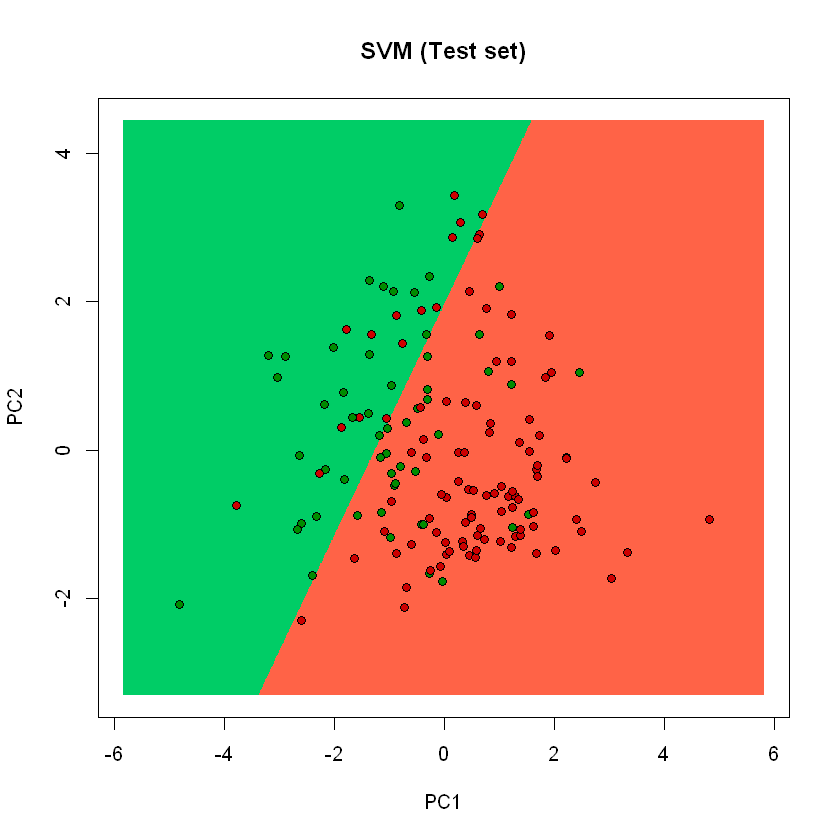

In [19]:
# Visualize the results
library(ElemStatLearn)
set = test_pca
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('PC1', 'PC2')
y_grid = predict(model, newdata = grid_set)
plot(set[, -3], main = 'SVM (Test set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

## 2. Kernel PCA

In [21]:
## Apply Kernel PCA
library(kernlab)
kpca = kpca(~., data = train_set[-label_col], kernel = 'rbfdot', features = 2)
train_kpca = as.data.frame(predict(kpca, train_set))
train_kpca$label = train_set$label
test_kpca = as.data.frame(predict(kpca, test_set))
test_kpca$label = test_set$label

In [22]:
# Train/Evaluate SVM
model = svm(formula = label ~ ., data = train_kpca,
            type = 'C-classification',kernel = 'linear')                     
predictions = predict(model, newdata = test_kpca[-3])
confusionMatrix(predictions, test_kpca$label)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 78 15
         1 22 39
                                          
               Accuracy : 0.7597          
                 95% CI : (0.6844, 0.8248)
    No Information Rate : 0.6494          
    P-Value [Acc > NIR] : 0.002122        
                                          
                  Kappa : 0.4877          
 Mcnemar's Test P-Value : 0.323940        
                                          
            Sensitivity : 0.7800          
            Specificity : 0.7222          
         Pos Pred Value : 0.8387          
         Neg Pred Value : 0.6393          
             Prevalence : 0.6494          
         Detection Rate : 0.5065          
   Detection Prevalence : 0.6039          
      Balanced Accuracy : 0.7511          
                                          
       'Positive' Class : 0               
                                          

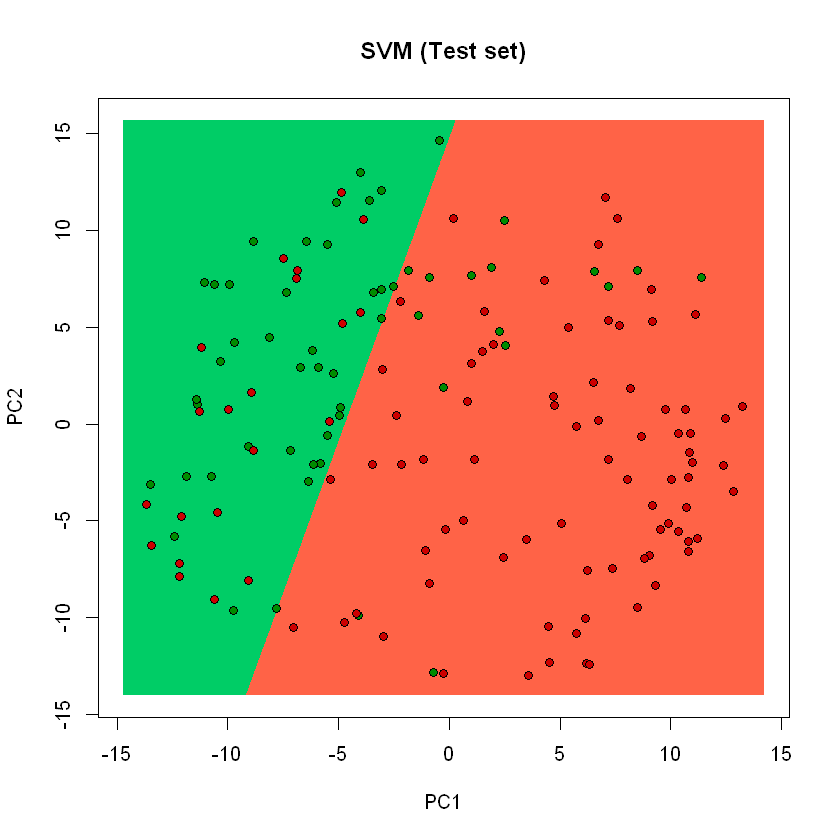

In [23]:
# Visualize the results
library(ElemStatLearn)
set = test_kpca
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('V1', 'V2')
y_grid = predict(model, newdata = grid_set)
plot(set[, -3], main = 'SVM (Test set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))